In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [2]:
results = requests.get('https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=336')

In [3]:
print(results.status_code)

200


In [4]:
soup = bs(results.content, 'html5lib') 
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 9]><html class="no-js lt-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <!-- Web Experience Toolkit (WET) / Boîte à outils de l'expérience Web (BOEW)
wet-boew.github.io/wet-boew/License-en.html / wet-boew.github.io/wet-boew/Licence-fr.html -->
  <title>
   Daily Data Report for October 2019 - Climate - Environment and Climate Change Canada
  </title>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <!-- Meta data -->
  <meta content="Daily Data Report for October 2019 - Climate - Environment and Climate Change Canada" name="dcterms.title"/>
  <meta content="climate, past weather" name="description"/>
  <meta content="climate; past weather" name="dcterms.subject" title="scheme"/>
  <meta content="2011-10-31" name="dcterms.issued" title="W3CDTF"/>
  <meta content="2019-09-19" name="dcterms.modified" title="W3CDTF"/>
  <meta con

In [5]:
print(soup.title.prettify())

<title>
 Daily Data Report for October 2019 - Climate - Environment and Climate Change Canada
</title>



In [6]:
col_header = [items.get_text().strip() for items in soup.find_all('th',{'scope':"col"})[0:10]]

In [7]:
col_header

['DAY',
 'Max Temp Definition°C',
 'Min Temp Definition°C',
 'Mean Temp Definition°C',
 'Heat Deg Days Definition',
 'Cool Deg Days Definition',
 'Total Rain Definitionmm',
 'Total Snow Definitioncm',
 'Total Precip Definitionmm',
 'Snow on Grnd Definitioncm']

In [8]:
row_data = [items.get_text().split() for items in soup.find_all('tr')[1:-4]]

In [9]:
row_data

[['01', '15.4', '3.0', '9.2', '8.8', '0.0', 'LegendMM', '0.0'],
 ['02', '15.2', '6.2', '10.7', '7.3', '0.0', 'LegendMM', '0.0'],
 ['03', '13.5', '7.8', '10.6', '7.4', '0.0', 'LegendMM', '3.7'],
 ['04', '15.2', '7.6', '11.4', '6.6', '0.0', 'LegendMM', '0.2'],
 ['05', '16.3', '6.1', '11.2', '6.8', '0.0', 'LegendMM', '0.0'],
 ['06', '14.6', '5.6', '10.1', '7.9', '0.0', 'LegendMM', '0.2'],
 ['07', '14.1', '9.0', '11.6', '6.4', '0.0', 'LegendMM', '19.1', '16', '39'],
 ['08', '14.1', '3.7', '8.9', '9.1', '0.0', 'LegendMM', '0.1', '33', '47'],
 ['09', '13.7', '0.2', '7.0', '11.0', '0.0', 'LegendMM', '0.0', '33', '41'],
 ['10', '12.1', '-2.2', '4.9', '13.1', '0.0', 'LegendMM', '0.0'],
 ['11', '16.5', '-0.3', '8.1', '9.9', '0.0', 'LegendMM', '0.0'],
 ['12', '13.2', '4.1', '8.7', '9.3', '0.0', 'LegendMM', '0.1'],
 ['13', '14.7', '6.1', '10.4', '7.6', '0.0', 'LegendMM', '0.0'],
 ['14', '14.6', '4.5', '9.5', '8.5', '0.0', 'LegendMM', '0.0'],
 ['15', '10.3', '7.7', '9.0', '9.0', '0.0', 'LegendMM', 

In [10]:
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
sns.set()

In [12]:
df = pd.DataFrame(row_data, columns=col_header)

In [13]:
df.columns

Index(['DAY', 'Max Temp Definition°C', 'Min Temp Definition°C',
       'Mean Temp Definition°C', 'Heat Deg Days Definition',
       'Cool Deg Days Definition', 'Total Rain Definitionmm',
       'Total Snow Definitioncm', 'Total Precip Definitionmm',
       'Snow on Grnd Definitioncm'],
      dtype='object')

In [14]:
df['DAY'] = df['DAY'].astype(str).astype(int)

In [15]:
df['Max Temp Definition°C'] = df['Max Temp Definition°C'].astype(float)

In [16]:
df['Mean Temp Definition°C'] = df['Mean Temp Definition°C'].astype(float)

In [17]:
df['Min Temp Definition°C'] = df['Min Temp Definition°C'].astype(float)

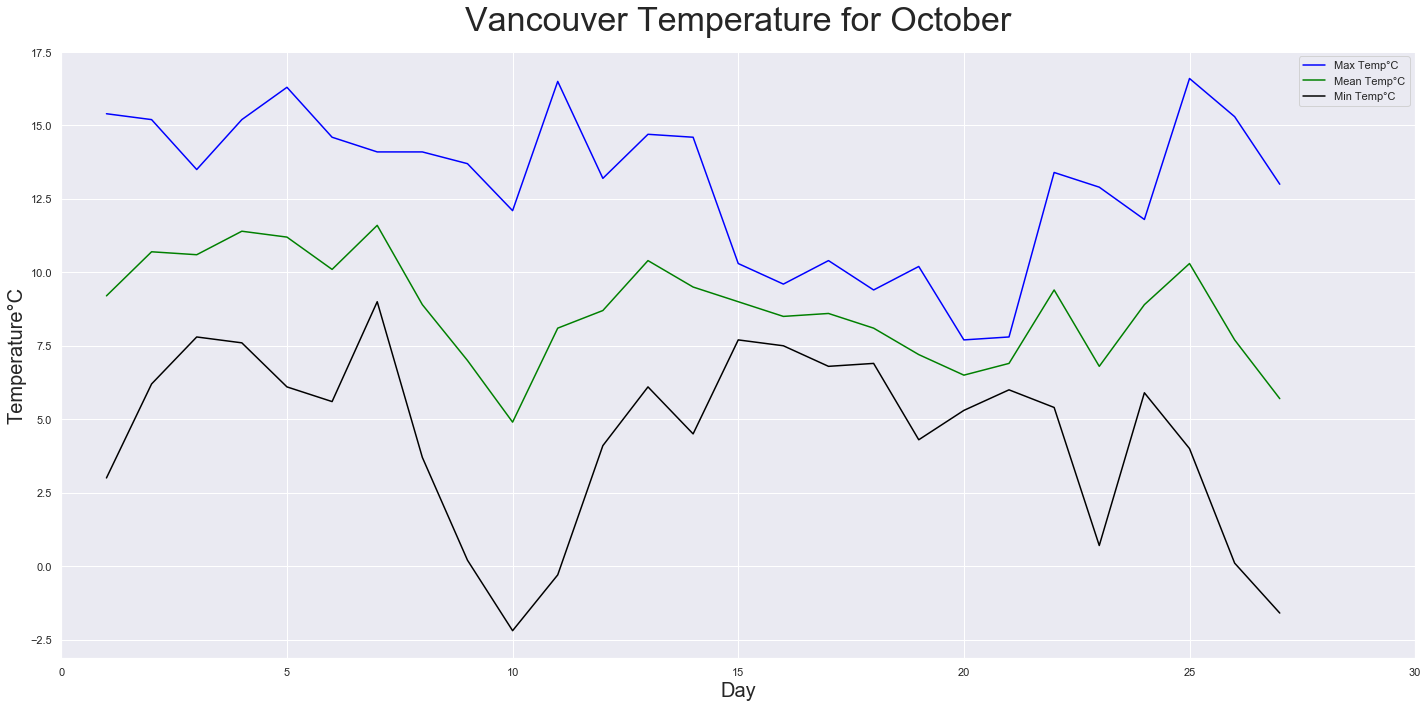

In [18]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x = "DAY",y = "Max Temp Definition°C", label="Max Temp°C", data=df,color ="blue",markers = True)
ax = sns.lineplot(x = "DAY",y = "Mean Temp Definition°C", label="Mean Temp°C",data=df,color ="green")
ax = sns.lineplot(x = "DAY",y = "Min Temp Definition°C", label="Min Temp°C",data=df,color ="black")
ax.set_title('Vancouver Temperature for October',fontdict ={'fontsize': 34},pad = 20)
ax.set_ylabel('Temperature°C',fontdict ={'fontsize': 20})
ax.set_xlabel('Day',fontdict ={'fontsize': 20})
ax.set_xlim(0, 30)
ax.legend()
plt.tight_layout()
plt.savefig('VancouverTemp.png')